In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#importing dataset
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [ ]:
#dropping columns not required
df_loan = df[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med"]]
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0


In [ ]:
df_loan.shape

(2740, 50)

In [ ]:
df_loan.drop(['emp_title', 'collections_12_mths_ex_med', 'pymnt_plan', 'url', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'initial_list_status', 'next_pymnt_d'], axis = 1, inplace = True)
df_loan.columns

In [ ]:
df_loan.shape

(2740, 40)

In [ ]:
df_loan.drop(['zip_code'], axis = 1, inplace = True)
df_loan.shape

(2740, 39)

In [ ]:
df_loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

## Data Imputation

In [ ]:
df_loan.loc[df["loan_status"] == "Charged Off", "loan_status"] = 2
df_loan.loc[df["loan_status"] == "Fully Paid", "loan_status"] = 0
df_loan.loc[df["loan_status"] == "Current", "loan_status"] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

In [ ]:
df_loan["int_rate"] = pd.to_numeric(df_loan["int_rate"].str.replace('%',''))
df_loan["loan_status"] = pd.to_numeric(df_loan["loan_status"])
df_loan.dtypes

<ipython-input-50-d7b3bbd1d3c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan["int_rate"] = pd.to_numeric(df_loan["int_rate"].str.replace('%',''))
<ipython-input-50-d7b3bbd1d3c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan["loan_status"] = pd.to_numeric(df_loan["loan_status"])


id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                  int64
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

# Correlation Analysis

In [ ]:
df_loan.installment.corr(df_loan.loan_status)

0.04466725829875556

In [ ]:
df_loan.annual_inc.corr(df_loan.loan_status)

-0.037998173412915615

In [ ]:
df_loan.total_rec_late_fee.corr(df_loan.annual_inc)

0.009708992837155045

In [ ]:
df_loan.loan_amnt.corr(df_loan.annual_inc)

0.40790638363896364

In [ ]:
df_loan.total_rec_int.corr(df_loan.annual_inc)

0.27288182397963706

In [ ]:
df_loan.int_rate.corr(df_loan.loan_amnt)

0.33494566008477933

In [ ]:
df_loan.int_rate.corr(df_loan.funded_amnt)

0.32033441895963277

In [ ]:
df_loan.recoveries.corr(df_loan.int_rate)

0.16811750498377048

In [ ]:
df_loan.total_rec_late_fee.corr(df_loan.int_rate)

0.05810958712056738

In [ ]:
df_loan.installment.corr(df_loan.funded_amnt)

0.9519873323620179

In [ ]:
df_loan.int_rate.corr(df_loan.loan_status)

0.27116682457349683

In [ ]:
df_loan.total_rec_int.corr(df_loan.loan_status)

0.16733253218964253

In [ ]:
df_loan.loc[df["term"] == " 36 months", "term"] = 0
df_loan.loc[df["term"] == " 60 months", "term"] = 1

In [ ]:
df_loan["term"] = pd.to_numeric(df_loan["term"])

<ipython-input-65-d2635002a79f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan["term"] = pd.to_numeric(df_loan["term"])


In [ ]:
df_loan.term.corr(df_loan.loan_status)

0.3201957176212676

In [ ]:
df_loan.term.corr(df_loan.total_rec_int)

0.6206196024544001

In [ ]:
df_loan.term.corr(df_loan.total_rec_late_fee)

0.04330202181503877

In [ ]:
bins = [4000, 10000, 25000, 75000, 100000, 200000, 300000, 400000, 500000, 8000000]
df_loan["income_bins"] = pd.cut(df['annual_inc'],bins)
df_loan["income_bins"]

<ipython-input-70-00f2c4154c00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan["income_bins"] = pd.cut(df['annual_inc'],bins)


0         (10000, 25000]
1         (25000, 75000]
2         (10000, 25000]
3         (25000, 75000]
4        (75000, 100000]
              ...       
2735      (25000, 75000]
2736      (25000, 75000]
2737    (100000, 200000]
2738    (100000, 200000]
2739    (100000, 200000]
Name: income_bins, Length: 2740, dtype: category
Categories (9, interval[int64, right]): [(4000, 10000] < (10000, 25000] < (25000, 75000] <
                                         (75000, 100000] ... (200000, 300000] < (300000, 400000] <
                                         (400000, 500000] < (500000, 8000000]]

In [ ]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'income_bins'],
      dtype='object')

# Finding Outliers in income and cleaning them

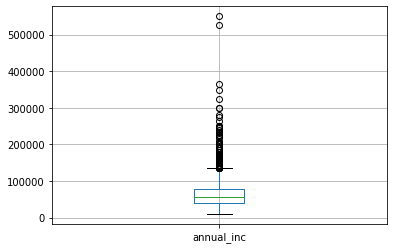

In [ ]:
boxplot = df_loan.boxplot(column=['annual_inc'])  

In [ ]:
df_loan = df_loan[df_loan["annual_inc"] < 130000]

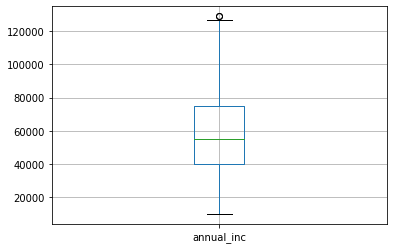

In [ ]:
boxplot = df_loan.boxplot(column=['annual_inc']) 

In [ ]:
df_loan.shape

(2607, 40)

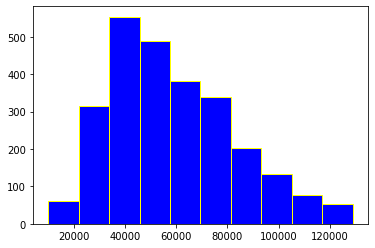

In [ ]:
plt.hist(df_loan["annual_inc"], bins = 10, color = 'blue', edgecolor = 'yellow' )
plt.show()

In [ ]:
df_loan.loc[df["grade"] == "A", "grade"] = 0
df_loan.loc[df["grade"] == "B", "grade"] = 1
df_loan.loc[df["grade"] == "C", "grade"] = 2
df_loan.loc[df["grade"] == "D", "grade"] = 3
df_loan.loc[df["grade"] == "E", "grade"] = 4
df_loan.loc[df["grade"] == "F", "grade"] = 5
df_loan.loc[df["grade"] == "G", "grade"] = 6

In [ ]:
df_loan['grade'] = pd.to_numeric(df_loan['grade'])

In [ ]:
df_loan.grade.corr(df_loan.funded_amnt)

0.32598298105953183